# 王蕴着

## 1.Pandas与Numpy操作
1.读取sz50.xlsx的['600036.XSHG','600050.XSHG','601318.XSHG']的全数据做成Panel

2.把Panel转成ndim为3的Numpy，然后用array的切片读取ndim为2的三只股票最近20天的收盘价

3.计算20天收盘价的对数，然后求对数的一天差值，得到对数收益率。

4.用Numpy将每只股票的对数收益率累加。

In [18]:
import pandas as pd
import numpy as np

symbols = ['600036.XSHG','600050.XSHG','601318.XSHG']
data_dict = {}
for s in symbols:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data
PN = pd.Panel(data_dict)
PN

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600036.XSHG to 601318.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume

In [19]:
arr = PN.values
print(arr.shape)
arr2D = arr[:,-20:,0]
print(arr2D)

(3, 215, 5)
[[106.22 106.94 105.94 112.13 110.89 108.14 107.34 107.78 107.98 106.18
  107.86 108.1  108.02 108.02 110.41 111.81 111.25 112.13 117.24 121.82]
 [  8.53   8.56   8.62   8.88   9.25   9.24   9.43   9.25   9.02   9.15
    9.63   9.5    9.9    9.97   9.96   9.49   9.68   9.61   9.63   9.8 ]
 [134.83 134.56 137.5  143.18 143.48 144.15 143.61 143.65 144.35 143.36
  146.41 144.71 148.56 156.53 157.12 157.72 154.99 163.52 168.58 169.57]]


In [20]:
arr2D = arr[:,-21:,0]
arr_log = np.log(arr2D)
arr_diff = np.diff(arr_log)
print(arr_diff)

[[ 0.00452916  0.00675551 -0.00939503  0.05678602 -0.01112019 -0.02511204
  -0.00742532  0.00409075  0.00185391 -0.01681026  0.01569832  0.00222263
  -0.00074033  0.          0.02188431  0.01260029 -0.00502108  0.00787899
   0.0445642   0.03832143]
 [-0.00933496  0.00351083  0.00698489  0.02971647  0.04082199 -0.00108167
   0.02035421 -0.01927255 -0.02517922  0.01430955  0.05112935 -0.01359143
   0.04124296  0.00704583 -0.00100351 -0.04833846  0.01982329 -0.00725768
   0.002079    0.01749916]
 [ 0.00535437 -0.00200453  0.02161372  0.04047866  0.00209307  0.00465877
  -0.00375313  0.00027849  0.00486112 -0.00688196  0.02105196 -0.01167917
   0.02625718  0.05225877  0.00376216  0.00381146 -0.01746071  0.05357471
   0.03047511  0.00585541]]


In [21]:
arr_cumsum = arr_diff.cumsum(axis=1)
arr_cumsum

array([[ 0.00452916,  0.01128468,  0.00188965,  0.05867566,  0.04755547,
         0.02244343,  0.01501812,  0.01910886,  0.02096277,  0.00415252,
         0.01985084,  0.02207347,  0.02133314,  0.02133314,  0.04321746,
         0.05581775,  0.05079667,  0.05867566,  0.10323987,  0.14156129],
       [-0.00933496, -0.00582413,  0.00116077,  0.03087724,  0.07169923,
         0.07061757,  0.09097178,  0.07169923,  0.04652002,  0.06082956,
         0.11195891,  0.09836748,  0.13961044,  0.14665627,  0.14565275,
         0.09731429,  0.11713758,  0.1098799 ,  0.11195891,  0.12945807],
       [ 0.00535437,  0.00334984,  0.02496356,  0.06544222,  0.06753529,
         0.07219407,  0.06844093,  0.06871943,  0.07358055,  0.06669859,
         0.08775055,  0.07607138,  0.10232856,  0.15458733,  0.15834949,
         0.16216095,  0.14470024,  0.19827495,  0.22875006,  0.23460546]])

## 2.用pandas计算滚动的协方差图表显示出来
1.用Pandas计算3只股票的三天收益率

2.计算滚动窗口为5（NaN需要填满）的协方差

3.画出三张两两对应的滚动协方差图表
提示：可以把数据保存为panel，使用unstack()['600036.XSHG','601318.XSHG']这个方法每次取出两个股票的数据画图，画子图可以使用subplot(311)

In [22]:
numbers = pd.DataFrame()
for s in symbols:
    stock = data_dict[s]
    three_day_change = stock.close.pct_change(3)
    three_day_change.name = s
    numbers = pd.concat([numbers, three_day_change], axis=1)
print(numbers.tail())

                     600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                  
2017-11-14 15:00:00     0.035086    -0.041414     0.061659
2017-11-15 15:00:00     0.029902    -0.029087    -0.009838
2017-11-16 15:00:00     0.015578    -0.035141     0.040733
2017-11-17 15:00:00     0.048565     0.014752     0.068856
2017-11-20 15:00:00     0.095011     0.012397     0.094071


In [23]:
df = numbers.fillna(0).rolling(window=5).cov()
print(df.tail(6))

                                 600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                              
2017-11-17 15:00:00 600036.XSHG     0.000163     0.000040     0.000060
                    600050.XSHG     0.000040     0.001499     0.000892
                    601318.XSHG     0.000060     0.000892     0.001359
2017-11-20 15:00:00 600036.XSHG     0.000926     0.000636     0.000833
                    600050.XSHG     0.000636     0.000734     0.000623
                    601318.XSHG     0.000833     0.000623     0.001524


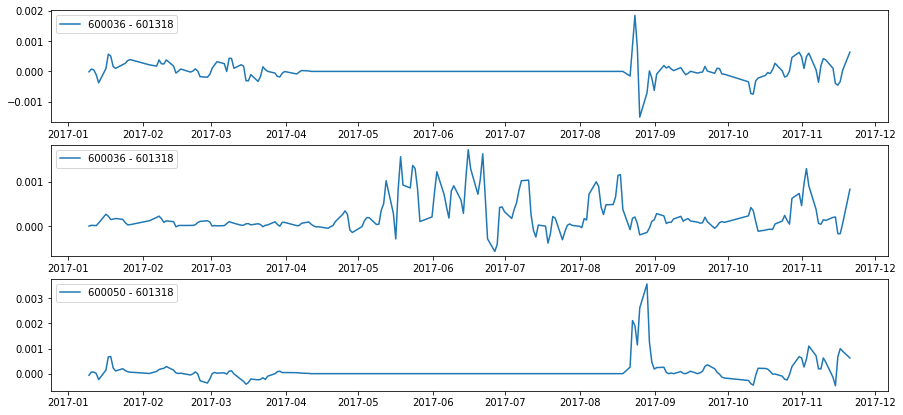

In [24]:
import matplotlib.pyplot as plt

_ = plt.figure(figsize=(15,7))
_ = plt.subplot(311)
_ = plt.plot(df.unstack()['600036.XSHG','600050.XSHG'])
_ = plt.legend(['600036 - 601318'], loc=2)
_ = plt.subplot(312)
_ = plt.plot(df.unstack()['600036.XSHG','601318.XSHG'])
_ = plt.legend(['600036 - 601318'], loc=2)
_ = plt.subplot(313)
_ = plt.plot(df.unstack()['600050.XSHG','601318.XSHG'])
_ = plt.legend(['600050 - 601318'], loc=2)

plt.show()

## 3.matplotlib
**填空题：根据以下要求填空**

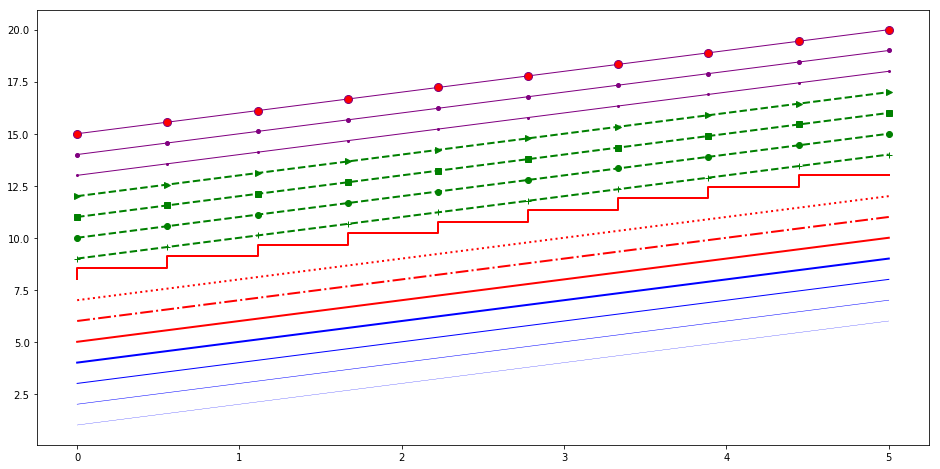

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
x = np.linspace(0, 5, 10)

# #   line 1 -- line 4 ，线形图，蓝色线，线宽分别为 0.25 ，0.50 ， 1.00 ，2.00
_ = ax.plot(x, x+1, color="blue", linewidth=0.25)
_ = ax.plot(x, x+2, color="blue", linewidth=0.50)
_ = ax.plot(x, x+3, color="blue", linewidth=1.00)
_ = ax.plot(x, x+4, color="blue", linewidth=2.00)

#   line 5 -- line 8 ，线形图，红色，线宽为2 ，线型（linestyle=）分别为 ‘-‘  ,‘-.’, ‘:’, ‘steps’
_ = ax.plot(x, x+5, color="red", lw=2, linestyle='-')
_ = ax.plot(x, x+6, color="red", lw=2, ls='-.')
_ = ax.plot(x, x+7, color="red", lw=2, ls=':')
_ = ax.plot(x, x+8, color="red", lw=2, ls='steps')

#   line 9 -- line 12 ，线形图，绿色，线宽为2 ， 线型为 ‘--’，点的样式（marker=） '+' , 'o' , 's' , '>'
_ = ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
_ = ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
_ = ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
_ = ax.plot(x, x+12, color="green", lw=2, ls='--', marker='>')

#  line 13-- line 15，
#  线形图，紫色，线宽为1 ， 线型为 ‘-’，点的样式 'o'  ，样式尺寸（markersize）分别为 2,4,8 ，样式颜色（markerfacecolor）：红色
_ = ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
_ = ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
_ = ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
plt.show()

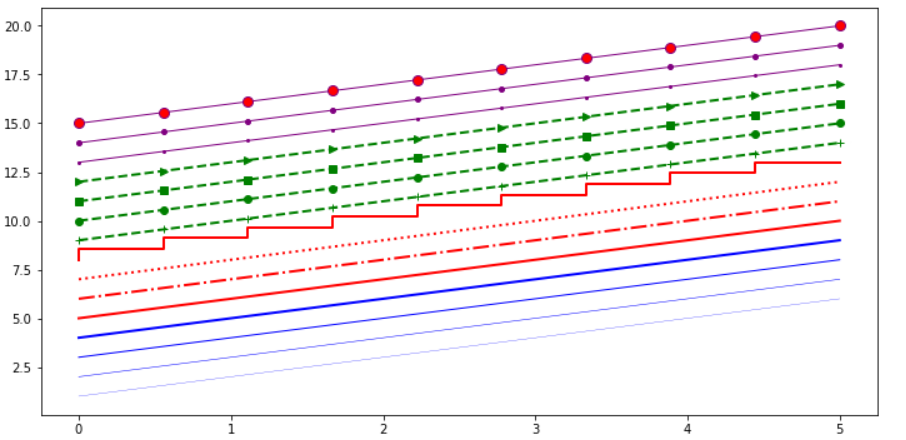